In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

In [4]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

In [5]:
msa = gpd.read_file("/Volumes/Xi/stephan/tl_2019_us_cbsa/tl_2019_us_cbsa.shp")
msa = msa.to_crs(epsg=4326)
mask = msa['NAMELSAD'].str.contains('Micro Area', na=False)
msa = msa[~mask]
msa.loc[msa['NAME'] == 'Louisville/Jefferson County, KY-IN', 'NAME'] = 'Louisville_Jefferson County, KY-IN'
cities=list(msa['NAME'])

In [24]:
cities

['Athens-Clarke County, GA',
 'Atlanta-Sandy Springs-Alpharetta, GA',
 'Atlantic City-Hammonton, NJ',
 'Auburn-Opelika, AL',
 'Augusta-Richmond County, GA-SC',
 'Austin-Round Rock-Georgetown, TX',
 'Bakersfield, CA',
 'Baltimore-Columbia-Towson, MD',
 'Bangor, ME',
 'Barnstable Town, MA',
 'Baton Rouge, LA',
 'Battle Creek, MI',
 'Bay City, MI',
 'Beaumont-Port Arthur, TX',
 'Beckley, WV',
 'Bellingham, WA',
 'Bend, OR',
 'Billings, MT',
 'Binghamton, NY',
 'Birmingham-Hoover, AL',
 'Bismarck, ND',
 'Blacksburg-Christiansburg, VA',
 'Bloomington, IL',
 'Bloomington, IN',
 'Bloomsburg-Berwick, PA',
 'Boise City, ID',
 'Boston-Cambridge-Newton, MA-NH',
 'Boulder, CO',
 'Bowling Green, KY',
 'Bremerton-Silverdale-Port Orchard, WA',
 'Bridgeport-Stamford-Norwalk, CT',
 'Brownsville-Harlingen, TX',
 'Brunswick, GA',
 'Buffalo-Cheektowaga, NY',
 'Cincinnati, OH-KY-IN',
 'Clarksville, TN-KY',
 'Cleveland, TN',
 'Cleveland-Elyria, OH',
 "Coeur d'Alene, ID",
 'College Station-Bryan, TX',
 'Colo

In [20]:
eval=['Chicago-Naperville-Elgin, IL-IN-WI',
      'Houston-The Woodlands-Sugar Land, TX',
      'Minneapolis-St. Paul-Bloomington, MN-WI',
      'Los Angeles-Long Beach-Anaheim, CA',
      'Miami-Fort Lauderdale-Pompano Beach, FL',
      'New York-Newark-Jersey City, NY-NJ-PA',
      'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD',
      'Phoenix-Mesa-Chandler, AZ',
       'San Francisco-Oakland-Berkeley, CA',
       'Seattle-Tacoma-Bellevue, WA',
       'Tampa-St. Petersburg-Clearwater, FL',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV'

]

In [23]:
graph_file

'/Volumes/Xi兔/road_graphml/Providence-Warwick, RI-MA.graphml'

In [25]:
for city in cities[283:]:
    if city in eval:
        continue
    graph_file = f'/Volumes/Xi兔/osmnx/msa_graphml/{city}.graphml'  # 替换为你的graphml文件路径
    G = nx.read_graphml(graph_file)
    communities_generator = community.greedy_modularity_communities(G)
    communities = sorted(communities_generator, key=len, reverse=True)
    node_to_community=get_label(communities)
    edge_list=get_edge_list(communities,node_to_community)
    gdf_edges_community = gpd.GeoDataFrame(edge_list, geometry='geometry')
    AOI=pd.read_csv(f'/Volumes/Xi兔/POI+street/TIN_AOI/AOI_{city}.csv')
    AOI.drop(columns=['Unnamed: 0'],inplace=True)
    AOI['geometry'] = AOI['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)  # 转换字符串为 Shapely 几何对象
    gdf_aoi = gpd.GeoDataFrame(AOI, geometry=gpd.GeoSeries(AOI['geometry']))
    aoi_coverage=get_aoi_coverage(gdf_aoi)
    gdf_aoi['covered'] = aoi_coverage
    gdf_aoi.to_file(f'/Volumes/Xi兔/POI+street/AOI_coverage/{city}_AOI_coverage.shp')




/Users/guanxi/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
/Users/guanxi/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
/Users/guanxi/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
/Users/guanxi/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
/Users/guanxi/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:698:

In [18]:
check=gpd.read_file(f'/Volumes/Xi兔/POI+street/AOI_coverage/{city}_AOI_coverage.shp')

In [19]:
check

,cluster,covered,geometry
0,1,1,"MULTILINESTRING ((-83.02786 34.04382, -83.028 ..."
1,2,1,"MULTILINESTRING ((-83.01528 34.05868, -83.0153..."
2,3,1,"MULTILINESTRING ((-83.29394 34.17475, -83.2913..."
3,4,3,"MULTILINESTRING ((-83.51504 33.9208, -83.51522..."
4,5,4,"MULTILINESTRING ((-83.22387 34.12102, -83.2250..."
5,6,3,"MULTILINESTRING ((-83.1301 33.88763, -83.12891..."
6,7,1,"MULTILINESTRING ((-83.31655 33.89112, -83.3164..."
7,8,1,"MULTILINESTRING ((-83.41827 33.86729, -83.4191..."
8,9,1,"MULTILINESTRING ((-83.12809 34.06428, -83.1278..."
9,10,1,"MULTILINESTRING ((-83.1121 33.86906, -83.11175..."


In [3]:
# 1. 读取GraphML格式的城市道路网络数据
graph_file = '/Volumes/Xi兔/road_graphml/msa_graphml3/Orlando-Kissimmee-Sanford, FL.graphml'  # 替换为你的graphml文件路径
G = nx.read_graphml(graph_file)

In [4]:
# 2. 使用Newman的最大模块度算法进行社区检测

communities_generator = community.greedy_modularity_communities(G)
communities = sorted(communities_generator, key=len, reverse=True)

In [21]:
community_sizes = [len(c) for c in communities]
min_size_threshold = np.mean(community_sizes)

In [22]:
large_communities = [set(c) for c in communities if len(c) >= min_size_threshold]
small_communities = [set(c) for c in communities if len(c) < min_size_threshold]

In [7]:
# 创建每个节点的社区标签
def get_label(communities):
    node_to_community = {}
    for community_id, nodes in enumerate(communities):
        for node in nodes:
            node_to_community[node] = community_id
    
    return node_to_community

In [8]:
from shapely.geometry import LineString
import shapely.wkt
from shapely import wkt

In [9]:
def get_edge_list(communities,node_to_community):
  edge_list = []
 
  for u, v, data in G.edges(data=True):
    # 如果边有 'geometry' 属性，直接使用它
    if 'geometry' in data:
        # 将字符串转换为 Shapely LineString 对象
        edge_geometry = shapely.wkt.loads(data['geometry'])
    else:
        if 'x' in G.nodes[u] and 'y' in G.nodes[u] and 'x' in G.nodes[v] and 'y' in G.nodes[v]:
            # 获取节点坐标并转换为浮点数
            pos_u = (float(G.nodes[u]['x']), float(G.nodes[u]['y']))
            pos_v = (float(G.nodes[v]['x']), float(G.nodes[v]['y']))
            edge_geometry = LineString([pos_u, pos_v])
        else:
            continue  # 如果节点没有坐标信息，跳过这条边

    # 获取其他属性，比如社区标签，如果有的话
    edge_community = None
    if u in node_to_community and v in node_to_community:
        if node_to_community[u] == node_to_community[v]:
            edge_community = node_to_community[u]

    # 将边的信息添加到 edge_list 中
    edge_list.append({
        'edge': (u, v),
        'community': edge_community,
        'geometry': edge_geometry,
    })
  return edge_list



In [ ]:
# 创建 GeoDataFrame 来存储所有的边信息
gdf_edges_community = gpd.GeoDataFrame(edge_list, geometry='geometry')

# 检查结果
print(gdf_edges_community.head())


In [48]:
AOI=pd.read_csv('/Volumes/Xi兔/POI+street/Orlando-Kissimmee-Sanford, FL_AOI.csv')
AOI.drop(columns=['Unnamed: 0'],inplace=True)

In [52]:

AOI['geometry'] = AOI['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)  # 转换字符串为 Shapely 几何对象
gdf_aoi = gpd.GeoDataFrame(AOI, geometry=gpd.GeoSeries(AOI['geometry']))

In [11]:
def get_aoi_coverage(gdf_aoi):
    # 初始化一个列表来存储每个 AOI 覆盖的社区数量
    aoi_coverage = []
    # 计算每个 AOI 覆盖的社区数量
    for idx, aoi in gdf_aoi.iterrows():
        covered_communities = gdf_edges_community[gdf_edges_community.intersects(aoi['geometry'])]['community'].unique()
        num_communities_covered = len(covered_communities)
        aoi_coverage.append(num_communities_covered)
    return aoi_coverage

In [55]:
gdf_aoi['num_communities_covered'] = aoi_coverage

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_19660/2580275904.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_communities)


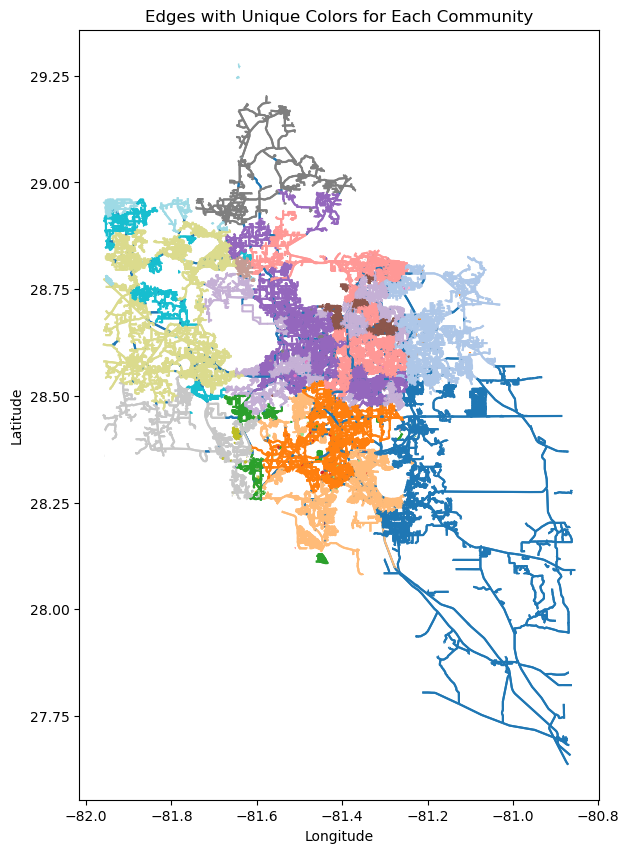

In [42]:
# 可视化 GeoDataFrame
import matplotlib.colors as mcolors



# 获取社区的唯一值，并为每个社区分配一种唯一的颜色
unique_communities = gdf_edges_community['community'].unique()
num_communities = len(unique_communities)

# 使用 matplotlib 生成独特的颜色列表
colors = plt.cm.get_cmap('tab20', num_communities)
community_color_map = {community: mcolors.to_hex(colors(i)) for i, community in enumerate(unique_communities)}

# 为每条边赋予颜色
gdf_edges_community['color'] = gdf_edges_community['community'].map(community_color_map)




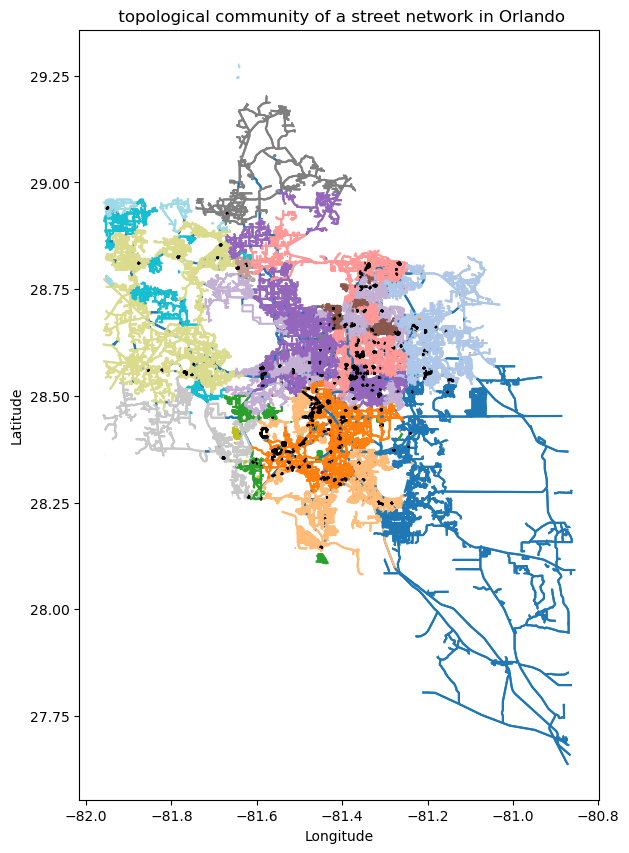

In [56]:
# 可视化 GeoDataFrame，使用指定颜色
fig, ax = plt.subplots(figsize=(10, 10))
gdf_edges_community.plot(ax=ax, color=gdf_edges_community['color'], legend=True)
# 再绘制 AOI，使用统一的黑色边框
gdf_aoi.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=2, label='AOI')
plt.title(" topological community of a street network in Orlando")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
